In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

blobs = pd.read_csv('kmeans_blobs.csv')
colnames = list(blobs.columns[1:-1])
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


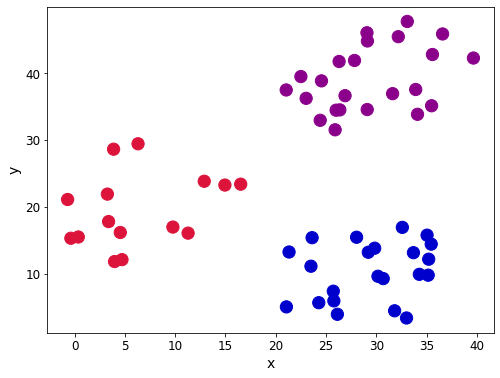

In [16]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150,
            c=blobs['cluster'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
def initiate_centroids(k, dset):
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['x','y']]
centroids = initiate_centroids(k, df)
centroids

,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.609


In [18]:
def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

C:\Users\cheta\AppData\Local\Temp\ipykernel_13080\3892863392.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,x,y,centroid,error
0,24.412,32.932,0,0.000000
1,35.190,12.189,1,211534.211314
2,26.288,41.718,2,699.601495
3,0.376,15.506,0,776856.744109
4,26.116,3.963,1,576327.599678


In [19]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,x,y
0,9.889444,23.242611
1,28.435750,11.546250
2,30.759333,40.311167


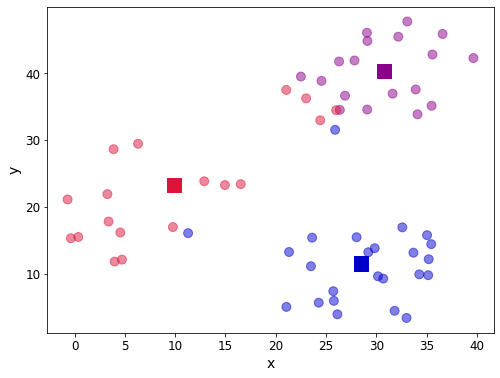

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [26]:
X_balanced, y_balanced = make_classification(n_samples=1000, n_classes=2, weights=[0.5,
0.5], random_state=42)
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
lr_balanced = LogisticRegression(random_state=42)
lr_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = lr_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
print("Accuracy on balanced dataset:", accuracy_balanced)

Accuracy on balanced dataset: 0.855


In [27]:
X_imbalanced, y_imbalanced = make_classification(n_samples=1000, n_classes=2,
weights=[0.9, 0.1], random_state=42)
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced, y_imbalanced, test_size=0.2, random_state=42)
lr_imbalanced = LogisticRegression(random_state=42)
lr_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)
y_pred_imbalanced = lr_imbalanced.predict(X_test_imbalanced)
accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
print("Accuracy on imbalanced dataset:", accuracy_imbalanced)

Accuracy on imbalanced dataset: 0.895


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [23.75, 23.75, 70.0, 70.0],
  [5.0, 5.0, 46.875, 46.875],
  [105.0, 105.0, 115.0, 115.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [110.0, 110.0, 133.75, 133.75],
  [95.0, 95.0, 121.875, 121.875],
  [25.9375, 25.9375, 108.4375, 108.4375],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [172.5, 172.5, 211.25, 211.25],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [260.0, 260.0, 294.375, 294.375],
  [191.875, 191.875, 277.1875, 277.1

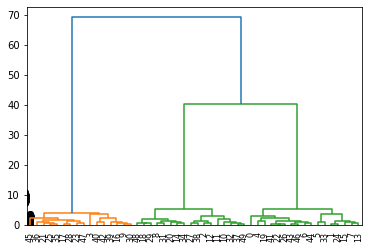

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(n_samples=50, centers=3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c='black')
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix)

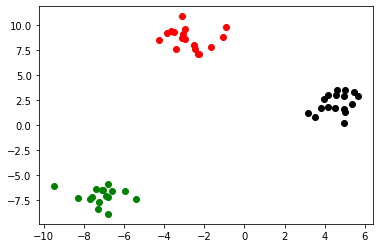

In [33]:
plt.figure()
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], c='red')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], c='green')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], c='black')
plt.show()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [6]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.60, random_state=0)
X = X[:, ::-1] 

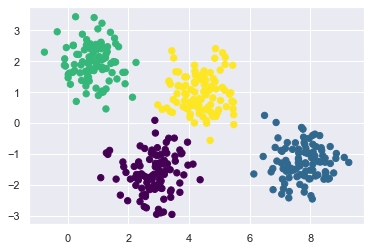

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

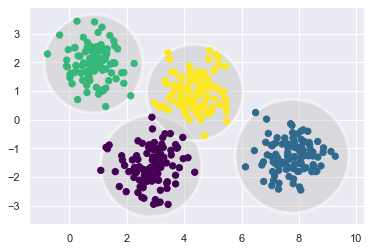

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

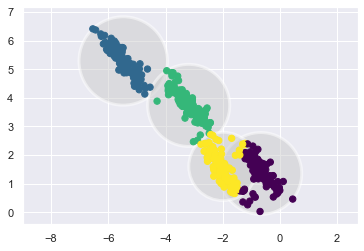

In [10]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

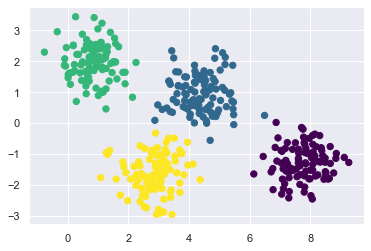

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [14]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.463 0.537 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]]


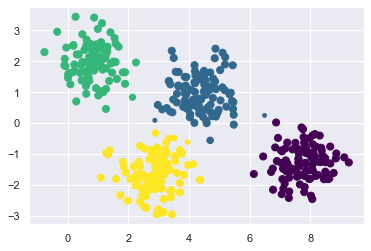

In [15]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [16]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

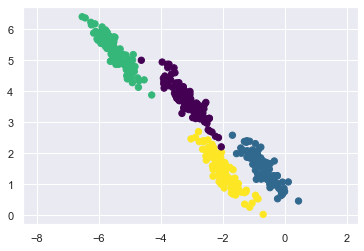

In [19]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

In [28]:
from kmodes.kmodes import KModes
import pandas as pd
import numpy as np
data=pd.read_csv("KModes_dataset.csv", index_col=["Student"])
untrained_model=KModes(n_clusters=3, n_init=4)
trained_model=untrained_model.fit(data)
clusters=trained_model.predict([['A', 'B', 'A', 'B', 'A'],
       ['A', 'A', 'B', 'B', 'A']])
print(clusters)

[0 0]


In [31]:
clusters=untrained_model.fit_predict(data)
print(clusters)

[0 0 1 0 0 1 0 0 0 0 0 1 2 1 0]


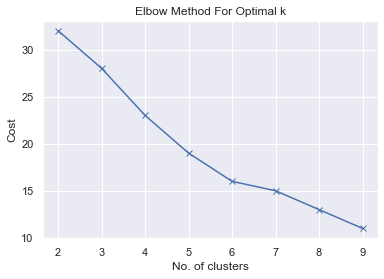

In [32]:
costs=[]
K=range(2, 10)
for k in K:
    untrained_model=KModes(n_clusters=k, n_init=4)
    trained_model=untrained_model.fit(data)
    costs.append(trained_model.cost_)
plt.plot(K, costs, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
data = pd.read_csv('diabetes.csv')
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# K-nearest neighbour classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
# Support Vector Machine
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
dtc_pred = dtc.predict(X_test)
svm_pred = svm.predict(X_test)
# Accuracy scores
knn_acc = accuracy_score(y_test, knn_pred)
dtc_acc = accuracy_score(y_test, dtc_pred)
svm_acc = accuracy_score(y_test, svm_pred)
print('K-nearest neighbour classifier accuracy:', knn_acc)
print('Decision tree classifier accuracy:', dtc_acc)
print('Support Vector Machine accuracy:', svm_acc)

K-nearest neighbour classifier accuracy: 0.6623376623376623
Decision tree classifier accuracy: 0.7467532467532467
Support Vector Machine accuracy: 0.7532467532467533


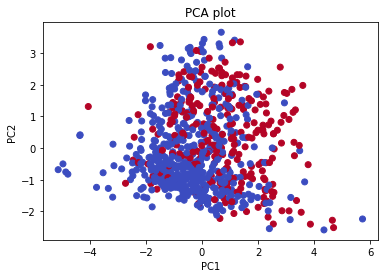

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('diabetes.csv')
# Split the data into predictors (X) and outcome variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Normalize the data
X_norm = (X - X.mean()) / X.std()
# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
# Visualize the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()